In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [145]:
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_csv("train.csv")

df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [19]:
len(df)

39161

#### Null Value analysis

In [20]:
all_col_null_count = df.isna().sum()
all_col_null_count

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [85]:
null_column = ['signup_date', 'products_purchased']

In [31]:
df_product = df['products_purchased']
length_all_product_row = df_product.size
print("Total count of rows under product purchased are {}".format(length_all_product_row))

print("Distinct value under product purchased ")
print(list(df_product.unique()))

Total count of rows under product purchased are 39161
Distinct value under product purchased 
[2.0, 3.0, nan, 1.0, 4.0]


In [33]:
countOfDistinctValue = dict(df_product.value_counts())
countOfDistinctValue['NaN'] = all_col_null_count['products_purchased']
print("Count of each distinct values {}".format(countOfDistinctValue))

Count of each distinct values {2.0: 8867, 3.0: 5024, 1.0: 3643, 4.0: 716, 'NaN': 20911}


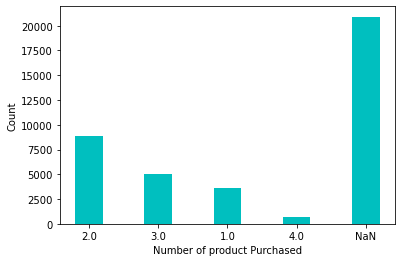

Total null percentage for products_purchased columns is 46.60248716835627


In [78]:
x = [str(x) for x in countOfDistinctValue.keys()]
y = list(countOfDistinctValue.values())
plt.bar(x, y, color ='c', width = 0.4)
plt.ylabel("Count")
plt.xlabel("Number of product Purchased")
plt.show()

null_percentage = ((length_all_product_row - countOfDistinctValue['NaN']) /length_all_product_row ) * 100
print("Total null percentage for products_purchased columns is {}".format(null_percentage))

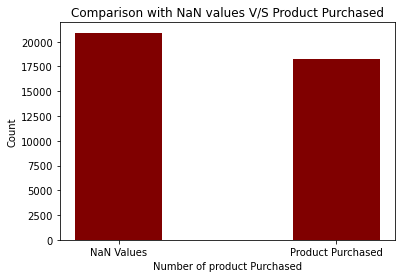

In [48]:
plt.bar(['NaN Values', 'Product Purchased'], [countOfDistinctValue['NaN'], (length_all_product_row - countOfDistinctValue['NaN'])], color ='maroon',
        width = 0.4)
plt.title("Comparison with NaN values V/S Product Purchased")
plt.xlabel("Number of product Purchased"
plt.ylabel("Count")
plt.show()

###### Way to handle column Product purchased "NULL" value is to assign 0. Because from above data we can understand that NaN are 46% and by observing above graph it is clearly understable that there is no user which is not buying any product hence it might possible that NaN is to represnt 0 product purchased.

In [76]:
year = list(pd.to_datetime(df['signup_date']).dt.year)

df_year = pd.DataFrame(year, columns=['signup_year'])['signup_year']

year_dict = dict(df_year.value_counts())
year_dict['NaN'] = all_col_null_count['signup_date']
year_dict

{2021.0: 9383,
 2020.0: 7134,
 2019.0: 3649,
 2022.0: 2207,
 2018.0: 1282,
 2017.0: 318,
 2016.0: 62,
 2015.0: 13,
 'NaN': 15113}

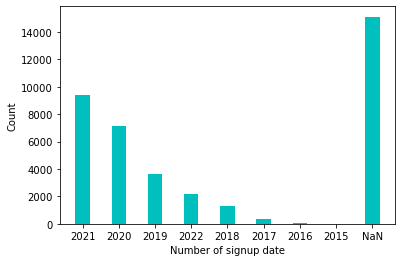

Total null percentage for signup_date column is 61.40803350271954


In [80]:
x = [str(int(x)) if type(x) is float else str(x) for x in year_dict.keys()]
y = list(year_dict.values())
plt.bar(x, y, color ='c', width = 0.4)
plt.ylabel("Count")
plt.xlabel("Number of signup date")
plt.show()

null_percentage = ((length_all_product_row - year_dict['NaN']) /length_all_product_row ) * 100
print("Total null percentage for signup_date column is {}".format(null_percentage))

#### Here, because more than half of the rows are null/NaN values. Hence till now it is hard to understand and conculde how to handle this null value therefore making further analysis

In [95]:
## Now applying below filter for further analysis for handling null values
##  1. considering only those columns which is containing null values 
##             i.e. 'NaN Values', 'Product Purchased' and target column i.e. buy
##  2. Take only those rows where signup_date is null

dfWhereSDIsNA = df[null_column + ['buy']][df['signup_date'].isna()]

0    15088
1       25
Name: buy, dtype: int64


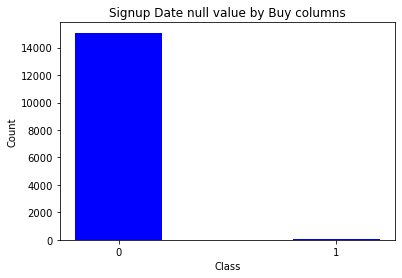

Null count percentage as per target column: Class 0 99.83457950109178 and class 1 0.16542049890822472


In [101]:
## count of signup_date where it is null with group by target column i.e. buy
null_count_by_target = dfWhereSDIsNA['buy'].value_counts()
print(null_count_by_target)

plt.bar(['0', '1'], list(null_count_by_target), color='b', width = 0.4)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Signup Date null value by Buy columns")
plt.show()

print("Null count percentage as per target column: Class 0 {} and class 1 {}".
      format((null_count_by_target[0]/all_col_null_count['signup_date']) * 100, 
            (null_count_by_target[1]/all_col_null_count['signup_date']) * 100))

#### It is dominating only 1 class where signup_date is NULL that is Class 0 with 99.83%

In [102]:
## This is to show the count of products_purchased where signup_date is NULL
countOfProductPurchased = dfWhereSDIsNA.isna().sum()
print("The count of products_purchased where signup_date is NULL {}".format(countOfProductPurchased['products_purchased']))
print("Percentage of row count where both columns conntaining null values {}".format(( countOfProductPurchased['products_purchased'] / all_col_null_count['signup_date'] ) * 100))

The count of products_purchased where signup_date is NULL 11261
Percentage of row count where both columns conntaining null values 74.51200952822073


###### Since it is hard to understand fill any value in place null values because filling any value can easily dominate the result of model hence better to not select this column at all.

#### Time Series analysis

In [105]:
## taking a copy of Original Dataframe
TS_df = df.copy()
TS_df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


###### Cleaning Data

In [130]:
TS_df['products_purchased'] = TS_df['products_purchased'].fillna(0.0)

In [133]:
TS_df = TS_df.drop(['signup_date'], axis=1)

###### Generating timesieries related columns

In [125]:
TS_df['day'] = pd.to_datetime(df['created_at']).dt.day
TS_df['month'] = pd.to_datetime(df['created_at']).dt.month
TS_df['day_name'] = pd.to_datetime(df['created_at']).dt.day_name()

In [134]:
TS_df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,...,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,day,month,day_name
0,1,2021-01-01,1,2,2.0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,Friday
1,2,2021-01-01,2,1,2.0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,Friday
2,3,2021-01-01,9,3,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Friday
3,4,2021-01-01,6,7,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Friday
4,5,2021-01-01,4,6,0.0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,Friday


In [163]:
from ipywidgets import widgets, Layout

# sample data
df1 = TS_df[['id', 'buy', 'campaign_var_1']].groupby(['campaign_var_1', 'buy']).count()
df2 = TS_df[['id', 'buy', 'campaign_var_2']].groupby(['campaign_var_2', 'buy']).count()

# create output widgets
widget1 = widgets.Output()
widget2 = widgets.Output()

# render in output widgets
with widget1:
    display(df1.style.set_caption('campaign_var_1'))
    df1.info()
with widget2:
    display(df2.style.set_caption('campaign_var_2'))
    df1.info()


# add some CSS styles to distribute free space
box_layout = Layout(display='flex',
                    flex_flow='row',
                    justify_content='space-around',
                    width='auto'
                   )
    
# create Horisontal Box container
hbox = widgets.HBox([widget1, widget2], layout=box_layout)

# render hbox
hbox

###### By above table we can conculde below points
- Starting point of campaign performing better than end point of it. (for both)
- last points in campaign are performing very dull wrt to buy. (for both)
- campaign 1 is performing good in middle points majorly 4-7 nearly 3.5K visit with ~270 buy
- campaign 2 is also performing good in middle points majorly 4-7 nearly 3.5K visit with ~350 buy


In [162]:
# Creates a pivot table dataframe
table = pd.pivot_table(TS_df, values ='id', index =['day_name', 'buy'],
                         columns =['campaign_var_1'], aggfunc = len)
  
display(table)
# Creates a pivot table dataframe
table = pd.pivot_table(TS_df, values ='id', index =['day_name', 'buy'],
                         columns =['campaign_var_2'], aggfunc = len)
  
display(table)

campaign_var_1     1      2      3      4      5      6      7      8      9   \
day_name  buy                                                                   
Friday    0     249.0  442.0  496.0  523.0  538.0  517.0  491.0  469.0  421.0   
          1      19.0   35.0   35.0   35.0   46.0   39.0   19.0   25.0   16.0   
Monday    0     195.0  478.0  531.0  553.0  574.0  539.0  550.0  486.0  360.0   
          1       9.0   39.0   28.0   48.0   44.0   27.0   27.0   18.0   13.0   
Saturday  0     190.0  445.0  499.0  540.0  525.0  546.0  512.0  486.0  386.0   
          1      16.0   33.0   33.0   31.0   43.0   41.0   17.0   23.0   14.0   
Sunday    0     239.0  489.0  470.0  525.0  513.0  563.0  497.0  488.0  383.0   
          1      13.0   46.0   43.0   44.0   32.0   33.0   32.0   19.0   18.0   
Thursday  0     201.0  450.0  499.0  556.0  557.0  545.0  485.0  459.0  419.0   
          1      19.0   37.0   47.0   35.0   31.0   29.0   32.0   17.0   16.0   
Tuesday   0     193.0  454.0  505.0  535.0  557.0  547.0  487.0  472.0  389.0   
          1      11.0   23.0   49.0   47.0   42.0   31.0   43.0   19.0   16.0   
Wednesday 0     229.0  479.0  508.0  509.0  529.0  576.0  535.0  395.0  405.0   
          1      10.0   36.0   41.0   37.0   29.0   28.0   29.0   31.0   10.0   

campaign_var_1     10     11     12     13     14    15    16  
day_name  buy                                                  
Friday    0     321.0  263.0  195.0  157.0  104.0  66.0  23.0  
          1      11.0    9.0    4.0    4.0    NaN   NaN   NaN  
Monday    0     344.0  263.0  195.0  144.0  105.0  58.0  24.0  
          1      14.0    3.0    2.0    NaN    NaN   1.0   NaN  
Saturday  0     363.0  260.0  205.0  147.0  112.0  56.0  29.0  
          1       9.0    5.0    1.0    2.0    1.0   NaN   NaN  
Sunday    0     375.0  253.0  200.0  146.0   99.0  66.0  27.0  
          1       9.0    4.0    2.0    2.0    NaN   NaN   NaN  
Thursday  0     345.0  260.0  197.0  151.0  107.0  57.0  23.0  
          1       5.0    7.0    5.0    2.0    1.0   2.0   NaN  
Tuesday   0     293.0  257.0  223.0  132.0   94.0  65.0  31.0  
          1       9.0   11.0    4.0    2.0    NaN   NaN   NaN  
Wednesday 0     290.0  269.0  216.0  170.0   91.0  85.0  24.0  
          1       4.0    9.0    6.0    NaN    NaN   NaN   NaN

campaign_var_2    1      2      3      4      5      6      7      8      9   \
day_name  buy                                                                  
Friday    0     89.0  233.0  389.0  558.0  663.0  749.0  751.0  631.0  496.0   
          1      3.0   15.0   23.0   51.0   57.0   62.0   33.0   22.0   20.0   
Monday    0     83.0  261.0  400.0  540.0  752.0  833.0  715.0  642.0  506.0   
          1      4.0    8.0   27.0   46.0   58.0   49.0   47.0   22.0    8.0   
Saturday  0     63.0  239.0  386.0  562.0  705.0  738.0  764.0  650.0  480.0   
          1      4.0   17.0   18.0   48.0   48.0   49.0   43.0   22.0   16.0   
Sunday    0     89.0  262.0  396.0  571.0  682.0  764.0  744.0  603.0  489.0   
          1      4.0   19.0   22.0   50.0   56.0   62.0   36.0   25.0   16.0   
Thursday  0     91.0  219.0  352.0  565.0  700.0  773.0  742.0  688.0  483.0   
          1      NaN   25.0   26.0   35.0   47.0   53.0   48.0   30.0   12.0   
Tuesday   0     79.0  224.0  377.0  557.0  688.0  772.0  733.0  609.0  500.0   
          1      4.0   11.0   30.0   54.0   57.0   48.0   41.0   41.0   15.0   
Wednesday 0     73.0  246.0  413.0  532.0  680.0  750.0  730.0  678.0  481.0   
          1      3.0    9.0   24.0   44.0   57.0   42.0   45.0   27.0   15.0   

campaign_var_2     10     11     12    13    14   15  
day_name  buy                                         
Friday    0     348.0  183.0  111.0  50.0  20.0  4.0  
          1       7.0    1.0    3.0   NaN   NaN  NaN  
Monday    0     291.0  198.0   91.0  57.0  26.0  4.0  
          1       3.0    1.0    NaN   NaN   NaN  NaN  
Saturday  0     313.0  205.0  113.0  61.0  19.0  3.0  
          1       3.0    1.0    NaN   NaN   NaN  NaN  
Sunday    0     319.0  235.0  111.0  41.0  24.0  3.0  
          1       6.0    1.0    NaN   NaN   NaN  NaN  
Thursday  0     320.0  196.0  114.0  42.0  23.0  3.0  
          1       7.0    1.0    NaN   1.0   NaN  NaN  
Tuesday   0     340.0  183.0  102.0  51.0  17.0  2.0  
          1       5.0    1.0    NaN   NaN   NaN  NaN  
Wednesday 0     333.0  203.0  116.0  48.0  22.0  5.0  
          1       3.0    1.0    NaN   NaN   NaN  NaN

###### By above pivot tables we can conclude below points
- Early middle point like we disussed above they are performing good and that is equally distrbuted between weekdays also.
- Other weekdays are somewhat is equally distributed but weekends are little bit higher but that is also by very negligible count

In [164]:
# Creates a pivot table dataframe
table = pd.pivot_table(TS_df, values ='id', index =['month', 'buy'],
                         columns =['campaign_var_1'], aggfunc = len)
  
display(table)
# Creates a pivot table dataframe
table = pd.pivot_table(TS_df, values ='id', index =['month', 'buy'],
                         columns =['campaign_var_2'], aggfunc = len)
  
display(table)

campaign_var_1     1      2      3      4      5      6      7      8      9   \
month buy                                                                       
1     0         106.0  183.0  169.0  134.0  137.0  110.0   94.0   78.0   71.0   
      1           5.0    7.0   12.0    4.0    7.0    6.0   10.0    6.0    4.0   
2     0          94.0  168.0  149.0  157.0  127.0  154.0  132.0  108.0   92.0   
      1           7.0    9.0   17.0   10.0   13.0   12.0    7.0    6.0    2.0   
3     0         132.0  219.0  208.0  221.0  239.0  191.0  154.0  165.0   98.0   
      1           4.0   22.0   17.0   16.0   15.0   10.0    5.0   10.0    3.0   
4     0         104.0  222.0  247.0  255.0  238.0  223.0  222.0  188.0  137.0   
      1           8.0   20.0   16.0   15.0   19.0   18.0   12.0    7.0    8.0   
5     0         124.0  243.0  293.0  285.0  291.0  296.0  252.0  226.0  175.0   
      1           8.0   19.0   22.0   15.0   25.0   14.0   13.0   13.0    4.0   
6     0         157.0  292.0  305.0  325.0  315.0  310.0  279.0  251.0  221.0   
      1           7.0   24.0   25.0   37.0   21.0   30.0   12.0   11.0    9.0   
7     0         131.0  331.0  330.0  329.0  334.0  365.0  323.0  279.0  255.0   
      1          18.0   27.0   20.0   26.0   32.0   17.0   23.0   10.0    6.0   
8     0         149.0  311.0  310.0  431.0  388.0  421.0  367.0  318.0  297.0   
      1          10.0   27.0   33.0   31.0   19.0   30.0   22.0   21.0   15.0   
9     0         115.0  347.0  352.0  355.0  400.0  419.0  434.0  352.0  288.0   
      1          13.0   32.0   26.0   30.0   29.0   17.0   27.0   21.0   13.0   
10    0         147.0  349.0  373.0  426.0  423.0  459.0  396.0  419.0  384.0   
      1           6.0   20.0   37.0   29.0   41.0   23.0   21.0   14.0   11.0   
11    0         124.0  292.0  403.0  431.0  467.0  397.0  425.0  416.0  356.0   
      1           7.0   23.0   20.0   30.0   26.0   25.0   20.0   15.0   14.0   
12    0         113.0  280.0  369.0  392.0  434.0  488.0  479.0  455.0  389.0   
      1           4.0   19.0   31.0   34.0   20.0   26.0   27.0   18.0   14.0   

campaign_var_1     10     11     12     13     14    15    16  
month buy                                                      
1     0          34.0   32.0   26.0   18.0    8.0   4.0   2.0  
      1           2.0    2.0    NaN    1.0    NaN   NaN   NaN  
2     0          59.0   34.0   32.0   23.0   10.0  10.0   1.0  
      1           2.0    5.0    2.0    NaN    NaN   NaN   NaN  
3     0         101.0   74.0   57.0   48.0   18.0  11.0   5.0  
      1           3.0    1.0    1.0    NaN    NaN   NaN   NaN  
4     0         155.0   98.0   55.0   43.0   24.0  12.0   5.0  
      1           2.0    3.0    NaN    NaN    NaN   NaN   NaN  
5     0         154.0  106.0   94.0   60.0   34.0  11.0  10.0  
      1           4.0    3.0    3.0    2.0    NaN   NaN   NaN  
6     0         190.0  143.0   95.0   71.0   41.0  31.0   8.0  
      1           4.0    NaN    1.0    2.0    NaN   NaN   NaN  
7     0         190.0  141.0  131.0   77.0   67.0  40.0  19.0  
      1           6.0    8.0    3.0    1.0    NaN   1.0   NaN  
8     0         255.0  215.0  147.0  108.0   80.0  59.0  15.0  
      1           6.0    5.0    3.0    1.0    NaN   NaN   NaN  
9     0         240.0  198.0  162.0  128.0   71.0  54.0  22.0  
      1           8.0    2.0    4.0    NaN    1.0   NaN   NaN  
10    0         321.0  219.0  196.0  149.0  106.0  61.0  37.0  
      1           9.0    6.0    1.0    1.0    NaN   1.0   NaN  
11    0         299.0  262.0  218.0  158.0  118.0  71.0  24.0  
      1           6.0    6.0    2.0    1.0    1.0   1.0   NaN  
12    0         333.0  303.0  218.0  164.0  135.0  89.0  33.0  
      1           9.0    7.0    4.0    3.0    NaN   NaN   NaN

campaign_var_2    1      2      3      4      5      6      7      8      9   \
month buy                                                                      
1     0         71.0  157.0  149.0  200.0  183.0  183.0  113.0   71.0   41.0   
      1          1.0    5.0    2.0   10.0   13.0   12.0   12.0    4.0    4.0   
2     0         46.0   91.0  162.0  218.0  178.0  220.0  179.0  115.0   72.0   
      1          NaN    7.0    9.0   13.0   19.0   14.0   11.0   12.0    4.0   
3     0         64.0  154.0  213.0  255.0  306.0  284.0  232.0  176.0  134.0   
      1          1.0    4.0   13.0   19.0   23.0   21.0   11.0    8.0    6.0   
4     0         51.0  144.0  219.0  286.0  339.0  358.0  276.0  223.0  143.0   
      1          4.0    7.0    4.0   18.0   34.0   24.0   20.0    9.0    5.0   
5     0         55.0  130.0  241.0  330.0  403.0  410.0  365.0  284.0  205.0   
      1          1.0    8.0   14.0   20.0   30.0   22.0   19.0   20.0    7.0   
6     0         49.0  188.0  268.0  353.0  422.0  443.0  411.0  354.0  253.0   
      1          1.0    9.0   15.0   33.0   32.0   46.0   18.0   20.0    8.0   
7     0         44.0  153.0  265.0  362.0  453.0  517.0  447.0  382.0  314.0   
      1          1.0   10.0   16.0   30.0   49.0   23.0   35.0   20.0   10.0   
8     0         52.0  164.0  265.0  392.0  534.0  541.0  569.0  468.0  367.0   
      1          3.0   12.0   10.0   43.0   41.0   34.0   37.0   21.0   18.0   
9     0         44.0  143.0  241.0  351.0  491.0  634.0  580.0  517.0  378.0   
      1          3.0   11.0   16.0   45.0   29.0   52.0   33.0   15.0   14.0   
10    0         37.0  145.0  268.0  413.0  503.0  633.0  644.0  615.0  465.0   
      1          2.0   15.0   26.0   33.0   38.0   41.0   29.0   20.0   11.0   
11    0         34.0  113.0  219.0  374.0  530.0  605.0  660.0  613.0  500.0   
      1          1.0    7.0   22.0   27.0   43.0   37.0   30.0   17.0    6.0   
12    0         20.0  102.0  203.0  351.0  528.0  551.0  703.0  683.0  563.0   
      1          4.0    9.0   23.0   37.0   29.0   39.0   38.0   23.0    9.0   

campaign_var_2     10     11     12    13    14   15  
month buy                                             
1     0          21.0    8.0    7.0   2.0   NaN  NaN  
      1           1.0    1.0    1.0   NaN   NaN  NaN  
2     0          39.0   15.0   10.0   5.0   NaN  NaN  
      1           2.0    NaN    NaN   1.0   NaN  NaN  
3     0          56.0   31.0   23.0  10.0   3.0  NaN  
      1           1.0    NaN    NaN   NaN   NaN  NaN  
4     0          99.0   49.0   25.0  10.0   6.0  NaN  
      1           2.0    NaN    1.0   NaN   NaN  NaN  
5     0         108.0   75.0   29.0  12.0   7.0  NaN  
      1           3.0    NaN    1.0   NaN   NaN  NaN  
6     0         145.0   82.0   46.0  15.0   3.0  2.0  
      1           1.0    NaN    NaN   NaN   NaN  NaN  
7     0         200.0  105.0   66.0  18.0  14.0  2.0  
      1           4.0    NaN    NaN   NaN   NaN  NaN  
8     0         237.0  152.0   82.0  33.0   9.0  6.0  
      1           4.0    NaN    NaN   NaN   NaN  NaN  
9     0         259.0  157.0   79.0  45.0  17.0  1.0  
      1           5.0    NaN    NaN   NaN   NaN  NaN  
10    0         333.0  212.0  117.0  58.0  19.0  3.0  
      1           2.0    3.0    NaN   NaN   NaN  NaN  
11    0         355.0  220.0  140.0  59.0  33.0  6.0  
      1           5.0    2.0    NaN   NaN   NaN  NaN  
12    0         412.0  297.0  134.0  83.0  40.0  4.0  
      1           4.0    1.0    NaN   NaN   NaN  NaN

###### By above pivot tables we can conclude below points
- We can clearly see that second half year are major buyer counts are present
- Last quarter seems great performer

In [167]:
# Creates a pivot table dataframe
table = pd.pivot_table(TS_df, values ='id', index =['products_purchased', 'buy'],
                         columns =['day_name'], aggfunc = len)
  
display(table)

day_name                Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
products_purchased buy                                                        
0.0                0      2811    2916      2859    2862      2845     2750   
                   1       157     138       137     157       145      169   
1.0                0       515     488       501     498       457      476   
                   1        41      19        40      38        37       39   
2.0                0      1220    1240      1174    1185      1232     1213   
                   1        56      66        45      58        53       52   
3.0                0       651     672       678     686       679      706   
                   1        33      43        37      35        38       30   
4.0                0        78      83        89     102        98       89   
                   1        10       7        10       9        12       17   

day_name                Wednesday  
products_purchased buy             
0.0                0         2823  
                   1          142  
1.0                0          466  
                   1           28  
2.0                0         1220  
                   1           53  
3.0                0          698  
                   1           38  
4.0                0          103  
                   1            9

###### By observing the above pivot it seems like that all data are equally distributed

In [171]:
# Creates a pivot table dataframe
table = pd.pivot_table(TS_df, values ='id', index =['month', 'buy'],
                         columns =['products_purchased'], aggfunc = len)
  
display(table)

products_purchased   0.0  1.0  2.0  3.0  4.0
month buy                                   
1     0              517  118  324  218   29
      1               33    5   16   10    2
2     0              626  131  348  217   28
      1               39   14   21   13    5
3     0              935  178  511  276   41
      1               48   12   26   13    8
4     0             1088  220  563  320   37
      1               62   18   20   20    8
5     0             1350  247  636  376   45
      1               79   17   27   18    4
6     0             1562  295  705  407   65
      1               86   28   40   24    5
7     0             1734  300  789  452   67
      1               97   22   47   26    6
8     0             2092  357  884  474   64
      1              115   27   39   31   11
9     0             2142  338  939  461   57
      1              118   23   44   29    9
10    0             2482  433  933  550   67
      1              128   23   36   25    8
11    0             2606  381  906  499   69
      1              111   29   27   27    3
12    0             2732  403  946  520   73
      1              129   24   40   18    5

###### In this also it seems like second half of the year is performing very well

In [178]:
TS_df.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'user_activity_var_1', 'user_activity_var_2',
       'user_activity_var_3', 'user_activity_var_4', 'user_activity_var_5',
       'user_activity_var_6', 'user_activity_var_7', 'user_activity_var_8',
       'user_activity_var_9', 'user_activity_var_10', 'user_activity_var_11',
       'user_activity_var_12', 'buy', 'day', 'month', 'day_name'],
      dtype='object')

In [179]:
listOfColumns = ['campaign_var_1', 'campaign_var_2',
       'products_purchased', 'user_activity_var_1', 'user_activity_var_2',
       'user_activity_var_3', 'user_activity_var_4', 'user_activity_var_5',
       'user_activity_var_6', 'user_activity_var_7', 'user_activity_var_8',
       'user_activity_var_9', 'user_activity_var_10', 'user_activity_var_11',
       'user_activity_var_12', 'day', 'month', 'day_name']

array([[<AxesSubplot:xlabel='id', ylabel='id'>,
        <AxesSubplot:xlabel='campaign_var_1', ylabel='id'>,
        <AxesSubplot:xlabel='campaign_var_2', ylabel='id'>,
        <AxesSubplot:xlabel='products_purchased', ylabel='id'>,
        <AxesSubplot:xlabel='user_activity_var_1', ylabel='id'>,
        <AxesSubplot:xlabel='user_activity_var_2', ylabel='id'>,
        <AxesSubplot:xlabel='user_activity_var_3', ylabel='id'>,
        <AxesSubplot:xlabel='user_activity_var_4', ylabel='id'>,
        <AxesSubplot:xlabel='user_activity_var_5', ylabel='id'>,
        <AxesSubplot:xlabel='user_activity_var_6', ylabel='id'>,
        <AxesSubplot:xlabel='user_activity_var_7', ylabel='id'>,
        <AxesSubplot:xlabel='user_activity_var_8', ylabel='id'>,
        <AxesSubplot:xlabel='user_activity_var_9', ylabel='id'>,
        <AxesSubplot:xlabel='user_activity_var_10', ylabel='id'>,
        <AxesSubplot:xlabel='user_activity_var_11', ylabel='id'>,
        <AxesSubplot:xlabel='user_activity_var_12',

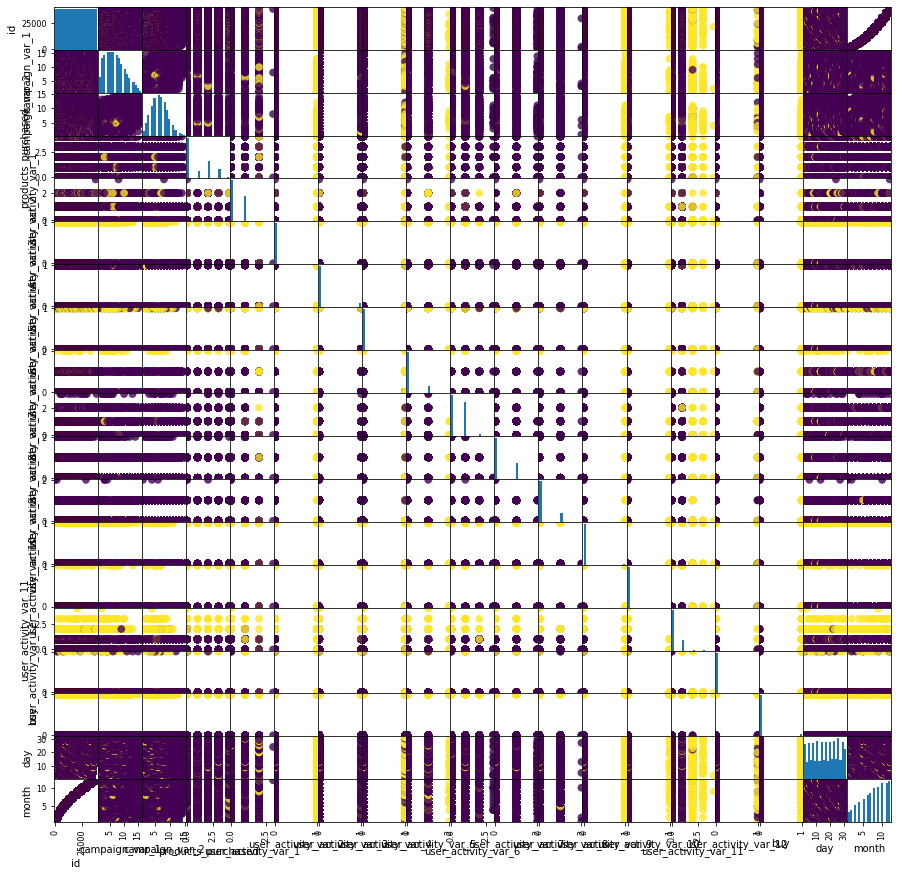

In [174]:
pd.plotting.scatter_matrix(TS_df[listOfColumns], c=TS_df['buy'], figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)


In [ ]:
import seaborn as sns

#df = sns.load_dataset("iris")
sns.pairplot(TS_df[listOfColumns] + TS_df['buy'], hue="buy")